In [1]:
import igl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
import skfuzzy as fuzz
import meshplot as mp

# 指定STL或OBJ檔案的路徑
stl_file_path = 'Terrific Blad.stl'

# 從指定檔案讀取三角網格數據
v, f = igl.read_triangle_mesh(stl_file_path)

# 計算法向量
n = igl.per_vertex_normals(v, f)

# # 使用 FCM 分群
# num_clusters = 5  # 指定群組的數量

# # 將法向量歸一化
# n_normalized = n / np.linalg.norm(n, axis=1)[:, np.newaxis]

# # 使用 FCM 算法進行分群
# cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
#     n_normalized.T, num_clusters, m=2, error=0.005, maxiter=1000
# )

# # 將每個頂點分配到最接近的群組
# labels = pairwise_distances_argmin_min(n_normalized, cntr.T)[0]

# # 準備可視化
# fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

# # 在左側的子圖中繪製原始三角網格
# ax0.set_title('Original Mesh')
# ax0.triplot(v[:, 0], v[:, 1], f)

# # 在右側的子圖中繪製分群後的三角網格
# ax1.set_title('Clustered Mesh')
# for cluster_label in range(num_clusters):
#     cluster_indices = np.where(labels == cluster_label)[0]
#     if len(cluster_indices) > 0:
#         cluster_vertices = v[cluster_indices]
#         cluster_faces = np.array([
#             [np.where(cluster_indices == i)[0][0] for i in face]
#             for face in f
#             if all(np.isin(face, cluster_indices))
#         ])
#         ax1.triplot(cluster_vertices[:, 0], cluster_vertices[:, 1], cluster_faces)

#         igl.write_triangle_mesh(f'cluster_n{cluster_label}.stl', cluster_vertices, cluster_faces)

# plt.show()
# mp.plot(cluster_vertices,cluster_faces)

In [124]:
# 指定保存的檔案路徑
output_file_path = 'vertex_coordinates.txt'

# 使用 numpy.savetxt 將頂點坐標寫入文本文件
np.savetxt(output_file_path, v, delimiter=' ', fmt='%1.6f')

# 提示信息
print(f"Vertex coordinates have been saved to '{output_file_path}'.")

Vertex coordinates have been saved to 'vertex_coordinates.txt'.


int64
(60,)
[18 19 20 21 22 23 36 37 38 39 40 41]
[42 43 44 45 46 47]
[ 6  7  8  9 10 11 12 13 14 15 16 17]
[48 49 50 51 52 53]
[24 25 26 27 28 29 30 31 32 33 34 35]
[ 0  1  2  3  4  5 54 55 56 57 58 59]


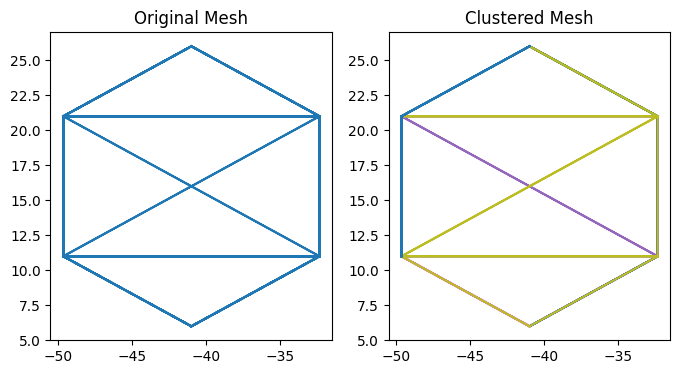

In [2]:
import igl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
import skfuzzy as fuzz

#分類完頂點之後，如果face的三個頂點都分類到同樣的label，才會顯示出來
# 使用 FCM 分群
num_clusters = 6  # 指定群組的數量

# 將法向量歸一化
n_normalized = n / np.linalg.norm(n, axis=1)[:, np.newaxis]

# 使用 FCM 算法進行分群
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    n_normalized.T, num_clusters, m=2, error=0.005, maxiter=1000
)

# 計算每個頂點到每個群組中心的距離
distances = np.linalg.norm(n_normalized[:, np.newaxis, :] - cntr, axis=2)

# 將每個頂點分配到最接近的群組
labels = np.argmin(distances, axis=1)
# 將labels保存到txt文件
np.savetxt('labels.txt', labels, fmt='%d')
print(labels.dtype)
print(labels.shape)

# 準備可視化
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

# 在左側的子圖中繪製原始三角網格
ax0.set_title('Original Mesh')
ax0.triplot(v[:, 0], v[:, 1], f)

# 在右側的子圖中繪製分群後的三角網格
ax1.set_title('Clustered Mesh')
for cluster_label in range(num_clusters):
    cluster_indices = np.where(labels == cluster_label)[0]
    print(cluster_indices)
    if len(cluster_indices) > 0:
        cluster_vertices = v[cluster_indices]
        cluster_faces = np.array([
            [np.where(cluster_indices == i)[0][0] for i in face]
            for face in f
            if all(np.isin(face, cluster_indices))#檢查該面的所有頂點是否都屬於當前群組。
        ])
        ax1.triplot(cluster_vertices[:, 0], cluster_vertices[:, 1], cluster_faces)

        igl.write_triangle_mesh(f'cluster_n{cluster_label}.stl', cluster_vertices, cluster_faces)

plt.show()

In [8]:
v[cluster_indices]

array([[ 3.14626, 15.3783 , -1.38592],
       [ 2.35483, 12.6778 , -2.23544],
       [ 3.1864 , 14.0828 , -2.48317],
       ...,
       [ 3.18805, 14.4002 , -2.46452],
       [ 3.18805, 14.2986 , -2.4465 ],
       [ 3.18804, 14.197  , -2.42886]])

In [101]:
labels.shape

(6475,)

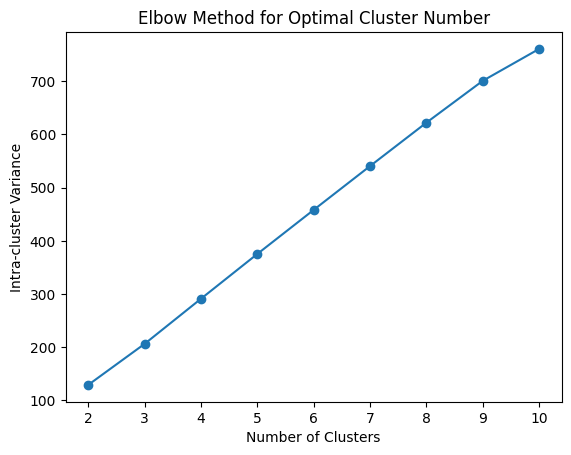

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 將法向量歸一化
n_normalized = n / np.linalg.norm(n, axis=1)[:, np.newaxis]
# 生成一些二維空間的測試數據
np.random.seed(53)
data = n_normalized

# 設定可能的聚類數量範圍
min_clusters = 2
max_clusters = 10

# 存儲每個聚類數量對應的內部聚類方差
cluster_variances = []

# 嘗試不同的聚類數量
for num_clusters in range(min_clusters, max_clusters + 1):
    # 使用 FCM 算法進行分群
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        data.T, num_clusters, m=2, error=0.005, maxiter=1000
    )

    # 計算每個點到每個群組中心的隸屬度
    distances = np.linalg.norm(data[:, np.newaxis, :] - cntr, axis=2)
    u_squared = u ** 2

    # 計算內部聚類方差
    intra_cluster_variance = np.sum(distances)

    # 將內部聚類方差添加到列表中
    cluster_variances.append(intra_cluster_variance)

# 繪製肘部法的圖表
plt.plot(range(min_clusters, max_clusters + 1), cluster_variances, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Intra-cluster Variance')
plt.show()

In [47]:
# from kneed import KneeLocator

# # 指定可能的群組數量範圍
# possible_clusters = range(2, 11)

# # 收集每個群組數量下的fuzzy score
# fuzzy_scores = []

# for num_clusters in possible_clusters:
#     _, u, _, _, _, _, _ = fuzz.cluster.cmeans(
#         n_normalized.T, num_clusters, m=2, error=0.005, maxiter=1000
#     )
#     fuzzy_scores.append(np.sum(u**2))  # Sum of squared membership values

# # 使用KneeLocator找到肘部點
# kl = KneeLocator(possible_clusters, fuzzy_scores, curve="convex", direction="decreasing")
# optimal_num_clusters = kl.elbow
# print(f"Optimal number of clusters: {optimal_num_clusters}")


Optimal number of clusters: 2


## 使用elbow method 尋找cluster_num

[ 0  1  2  3  4  5 42 43 44 45 46 47]
[63 64 65 66 67 68]
[12 13 14 15 16 17 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 75 76 77
 78 79 80 81 82 83]
[]
[]
[ 6  7  8  9 10 11 18 19 20 21 22 23]
[]


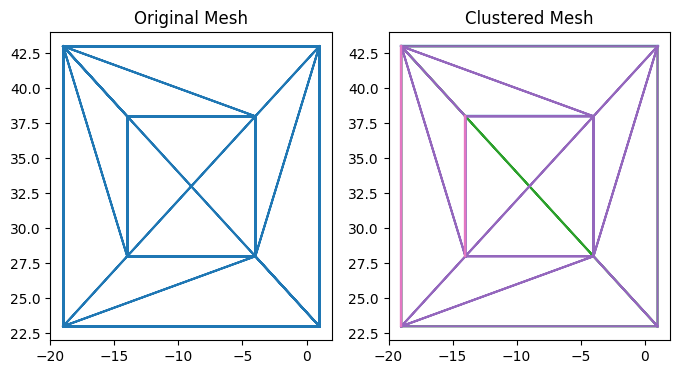

7


In [17]:
import igl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
import skfuzzy as fuzz

# 從指定檔案讀取三角網格數據
stl_file_path = 'bouble_cube.stl'
v, f = igl.read_triangle_mesh(stl_file_path)

# 計算法向量
n = igl.per_vertex_normals(v, f)

# 將法向量歸一化
n_normalized = n / np.linalg.norm(n, axis=1)[:, np.newaxis]

# 嘗試的群組數量範圍
num_clusters_range = range(2, 10)

# 存儲每個群組數量對應的模糊度
fuzzy_variances = []

# 使用 FCM 算法進行分群，並計算每個群組數量對應的模糊度
for num_clusters in num_clusters_range:
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        n_normalized.T, num_clusters, m=2, error=0.005, maxiter=1000
    )
    distances = np.linalg.norm(n_normalized[:, np.newaxis, :] - cntr, axis=2)
    fuzzy_variance = np.sum(u**2)  # 模糊度的度量
    fuzzy_variances.append(fuzzy_variance)

# 使用肘部方法找到最佳的群組數量
best_num_clusters = np.argmin(np.diff(fuzzy_variances)) + 2

# 使用 FCM 算法進行分群
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    n_normalized.T, num_clusters, m=2, error=0.005, maxiter=1000
)

# 計算每個頂點到每個群組中心的距離
distances = np.linalg.norm(n_normalized[:, np.newaxis, :] - cntr, axis=2)

# 將每個頂點分配到最接近的群組
labels = np.argmin(distances, axis=1)

# 準備可視化
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 4))

# 在左側的子圖中繪製原始三角網格
ax0.set_title('Original Mesh')
ax0.triplot(v[:, 0], v[:, 1], f)

# 在右側的子圖中繪製分群後的三角網格
ax1.set_title('Clustered Mesh')
for cluster_label in range(best_num_clusters):
    cluster_indices = np.where(labels == cluster_label)[0]
    print(cluster_indices)
    if len(cluster_indices) > 0:
        cluster_vertices = v[cluster_indices]
        cluster_faces = np.array([
            [np.where(cluster_indices == i)[0][0] for i in face]
            for face in f
            if all(np.isin(face, cluster_indices))
        ])
        ax1.triplot(cluster_vertices[:, 0], cluster_vertices[:, 1], cluster_faces)

        igl.write_triangle_mesh(f'cluster_n{cluster_label}.stl', cluster_vertices, cluster_faces)

plt.show()
print(best_num_clusters)

In [94]:
mp.plot(v,f,n)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(2.4139499…

## 可視化向量分布

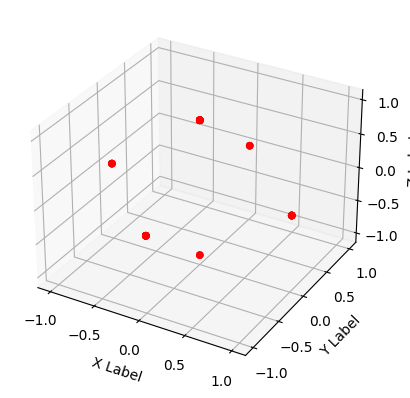

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 生成一些3D空間的測試數據
np.random.seed(42)
data =n_normalized

# 創建3D圖
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 繪製散點圖
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')

# 設定座標軸標籤
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 顯示圖形
plt.show()

## 使用DBSCAN 分群法

In [1]:
import igl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
import skfuzzy as fuzz
import meshplot as mp

# 指定STL或OBJ檔案的路徑
stl_file_path = 'cube.stl'

# 從指定檔案讀取三角網格數據
v, f = igl.read_triangle_mesh(stl_file_path)

# 計算法向量
n = igl.per_vertex_normals(v, f)

# 將法向量歸一化
n_normalized = n / np.linalg.norm(n, axis=1)[:, np.newaxis]
np.savetxt('v.txt', v, fmt='%d')
np.savetxt('n.txt', n, fmt='%d')
n


array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [-1.,  0.,  0.],
       [-1.,  0.,  0.],
       [-1.,  0.,  0.],
       [-1.,  0.,  0.],
       [-1.,  0.,  0.],
       [-1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0., -1.],
       [ 0.,  0., -1.],
       [ 0.,  0., -1.],
       [ 0.,  0., -1.],
       [ 0.,  0., -1.],
       [ 0.,  0., -1.],
       [ 0., -1.,  0.],
       [ 0., -1.,  0.],
       [ 0., -1.,  0.],
       [ 0., -1.,  0.],
       [ 0., -1.,  0.],
       [ 0., -1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

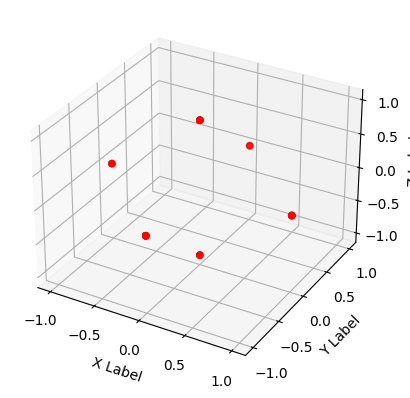

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 生成一些3D空間的測試數據
np.random.seed(42)
data =n_normalized

# 創建3D圖
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 繪製散點圖
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')

# 設定座標軸標籤
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 顯示圖形
plt.show()

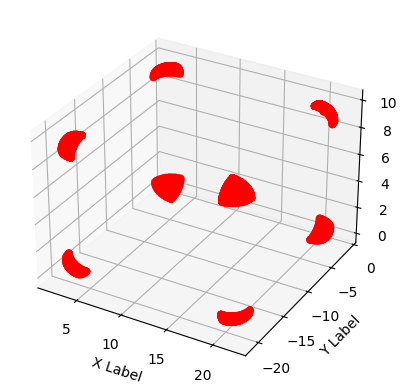

In [34]:
# 生成一些3D空間的測試數據
np.random.seed(42)
data =v

# 創建3D圖
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 繪製散點圖
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')

# 設定座標軸標籤
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 顯示圖形
plt.show()

In [3]:
from sklearn.cluster import DBSCAN
# 使用 DBSCAN 算法進行分群
dbscan = DBSCAN(eps=0.1, min_samples=6)  # 根據需要調整參數
labels_db = dbscan.fit_predict(n_normalized)
# labels_db=labels_db+1
 # 將群組標籤轉換為整數
# labels = labels.astype(int)
np.savetxt('labels_bd.txt', labels_db, fmt='%d')
print(labels_db.dtype)
print(labels_db.shape)

int64
(36,)


In [4]:
unique_labels = np.unique(labels_db)
num_clusters = len(unique_labels)

print("分群數量：", num_clusters)

分群數量： 6


[0 1 2 3 4 5]
[ 6  7  8  9 10 11]
[12 13 14 15 16 17]
[18 19 20 21 22 23]
[24 25 26 27 28 29]
[30 31 32 33 34 35]


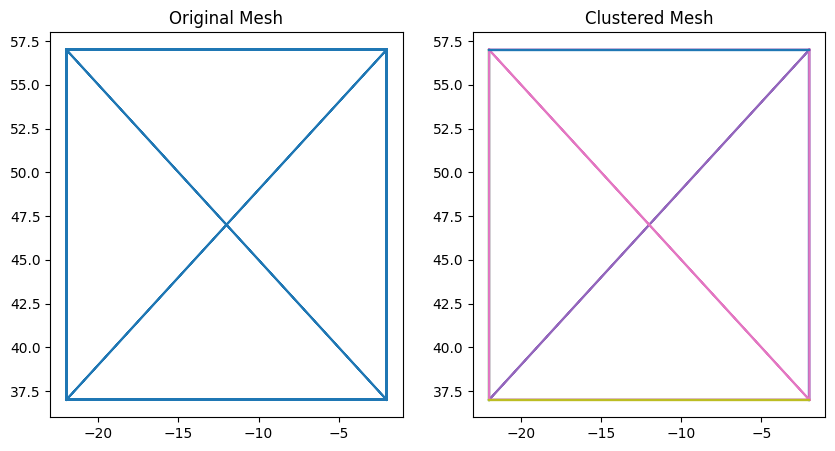

In [28]:
# 準備可視化
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

# 在左側的子圖中繪製原始三角網格
ax0.set_title('Original Mesh')
ax0.triplot(v[:, 0], v[:, 1], f)
rebuild=[]
# 在右側的子圖中繪製分群後的三角網格
ax1.set_title('Clustered Mesh')
for cluster_label in range(num_clusters):
    cluster_indices = np.where(labels_db == cluster_label)[0]
    print(cluster_indices)
    if len(cluster_indices) > 0:
        cluster_vertices = v[cluster_indices]
        cluster_faces = np.array([
            [np.where(cluster_indices == i)[0][0] for i in face]
            for face in f
            if all(np.isin(face, cluster_indices))
        ], dtype=int)

        # 確保 cluster_faces 至少包含一些有效的三角形
        if len(cluster_faces) > 0 and len(cluster_faces[0]) > 0:
            ax1.triplot(cluster_vertices[:, 0], cluster_vertices[:, 1], cluster_faces)

            igl.write_triangle_mesh(f'cluster_n{cluster_label}.stl', cluster_vertices, cluster_faces)
            rebuild.append(f'cluster_n{cluster_label}.stl')
            
plt.show()

In [113]:
rebuild[0]

'cluster_n0.stl'

## 以座標點分群

In [116]:
# from sklearn.cluster import DBSCAN
# from stl import mesh

# # 使用 DBSCAN 算法進行分群
# dbscan = DBSCAN(eps=0.1, min_samples=6)  # 根據需要調整參數

# for cluster_n in rebuild:
#     print(cluster_n)
#     mesh_data = mesh.Mesh.from_file(cluster_n)#讀取依照法向量分群後的網格
#     print(mesh_data)
#     v, f = igl.read_triangle_mesh(mesh_data)
#     labels_db = dbscan.fit_predict(v)
    
#     unique_labels = np.unique(labels_db)
#     num_clusters = len(unique_labels)
#     print("分群數量：", num_clusters)
#     rebuild=[]
#     for cluster_label in range(num_clusters):
#         cluster_indices = np.where(labels_db == cluster_label)[0]
#         print(cluster_indices)
#         if len(cluster_indices) > 0:
#             cluster_vertices = v[cluster_indices]
#             cluster_faces = np.array([
#             [np.where(cluster_indices == i)[0][0] for i in face]
#             for face in f
#             if all(np.isin(face, cluster_indices))], dtype=int)
#             # 確保 cluster_faces 至少包含一些有效的三角形
#             if len(cluster_faces) > 0 and len(cluster_faces[0]) > 0:
#                 ax1.triplot(cluster_vertices[:, 0], cluster_vertices[:, 1], cluster_faces)
#                 igl.write_triangle_mesh(f'cluster_v{cluster_n,cluster_label}.stl', cluster_vertices, cluster_faces)
#                 rebuild.append(f'cluster_v{cluster_n,cluster_label}.stl')
# plt.show()




cluster_n0.stl
<Mesh: b'cluster_n0.stl' 3087 vertices>


TypeError: read_triangle_mesh(): incompatible function arguments. The following argument types are supported:
    1. (filename: str, dtypef: numpy.dtype | str | type = 'float') -> Tuple[object, object]

Invoked with: <Mesh: b'cluster_n0.stl' 3087 vertices>

In [7]:
from sklearn.cluster import DBSCAN
from stl import mesh

# 使用 DBSCAN 算法進行分群
dbscan = DBSCAN(eps=0.1, min_samples=6)  # 根據需要調整參數
for cluster_n in rebuild:

    v, f = igl.read_triangle_mesh(cluster_n)  # Change this line
    labels_db = dbscan.fit_predict(v)
    
    unique_labels = np.unique(labels_db)
    num_clusters = len(unique_labels)
    print("分群數量：", num_clusters)

    for cluster_label in range(num_clusters):
        cluster_indices = np.where(labels_db == cluster_label)[0]
        print(cluster_indices)
        if len(cluster_indices) > 0:
            cluster_vertices = v[cluster_indices]
            cluster_faces = np.array([
                [np.where(cluster_indices == i)[0][0] for i in face]
                for face in f
                if all(np.isin(face, cluster_indices))], dtype=int)
            # 確保 cluster_faces 至少包含一些有效的三角形
            if len(cluster_faces) > 0 and len(cluster_faces[0]) > 0:
                plt.triplot(cluster_vertices[:, 0], cluster_vertices[:, 1], cluster_faces)
                igl.write_triangle_mesh(f'{cluster_n}_cluster_v{cluster_label}.stl', cluster_vertices, cluster_faces)
                rebuild.append(f'{cluster_n}_cluster_v{cluster_label}.stl')


分群數量： 1
[]
分群數量： 1
[]
分群數量： 1
[]
分群數量： 4
[ 2  5  7  9 12 15 18 21 24 27 30 46 50 68]
[ 33 110 118 121 127 130 133 136]
[ 52  55  58  62  63  70  73  76  79  82  85  88  91  94  98 101 104 106
 111 116 143 145 149 152 155 157 160 164 166 170 173 175 178 181 185]
[]
分群數量： 8
[  1   7  55  58  61  71  96 100]
[  5  11  14  22 113 116 122 128]
[ 15  23  37  43  46  49  52 115 118 124]
[17 19 25 33 38 41]
[ 60 101 104 106 109 121 126 130 133 136 139 142 146 147 152 154 157 160
 164 167 168 172 175 179 182 184]
[65 67 73 76 80 81]
[69 82 86 89 92 95 98]
[]


In [8]:
rebuild

['cluster_n0.stl',
 'cluster_n1.stl',
 'cluster_n2.stl',
 'cluster_n3.stl',
 'cluster_n4.stl']

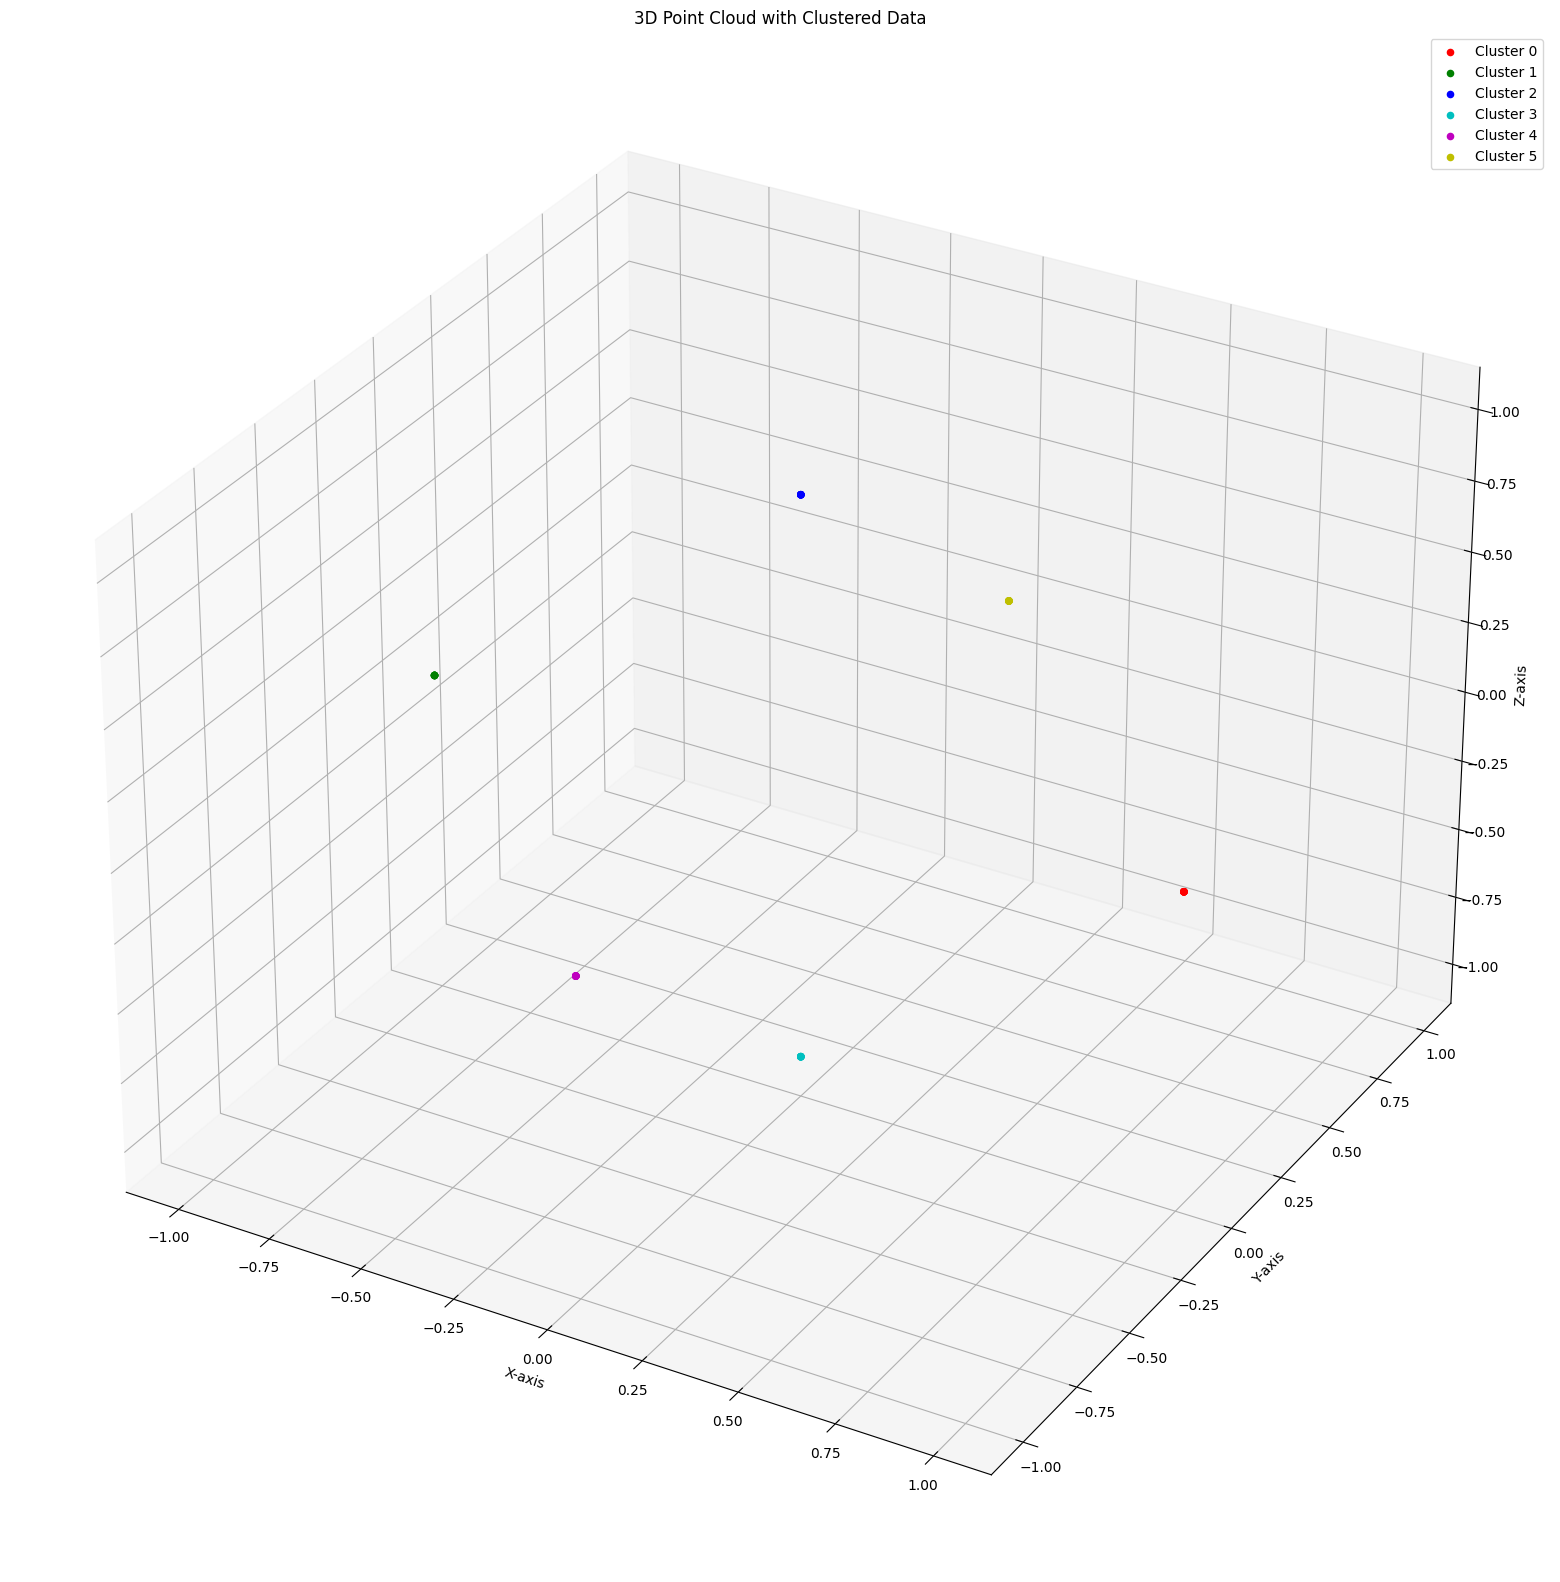

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# def generate_point_cloud(num_points, num_clusters):
#     # 生成 num_points 個隨機的三維點
#     points = np.random.rand(num_points, 3)

#     # 生成 num_clusters 個隨機的中心點
#     cluster_centers = np.random.rand(num_clusters, 3)

#     # 計算每個點屬於哪個群
#     labels = np.random.randint(0, num_clusters, num_points)

#     # 根據群的中心，使點離中心點有一些偏移
#     for i in range(num_clusters):
#         points[labels == i] += cluster_centers[i]

#     return points, labels

def plot_3d_point_cloud(points, labels):
    # 準備不同分群的顏色
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k','blue','pink','gray','purple','orange','cyan','green','olive','tan','gold','violet','hotpink','tomato']

    # 創建 3D 散點圖
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')

    # 根據分群標籤繪製點
    for label in np.unique(labels):
        indices = labels == label
        ax.scatter(points[indices, 0], points[indices, 1], points[indices, 2], c=colors[label], label=f'Cluster {label}')

    # 設置標題和軸標籤
    ax.set_title('3D Point Cloud with Clustered Data')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    # 顯示分群的圖例
    ax.legend()

    # 顯示散點圖
    plt.show()



# 顯示分群結果
plot_3d_point_cloud(n_normalized, labels_db)

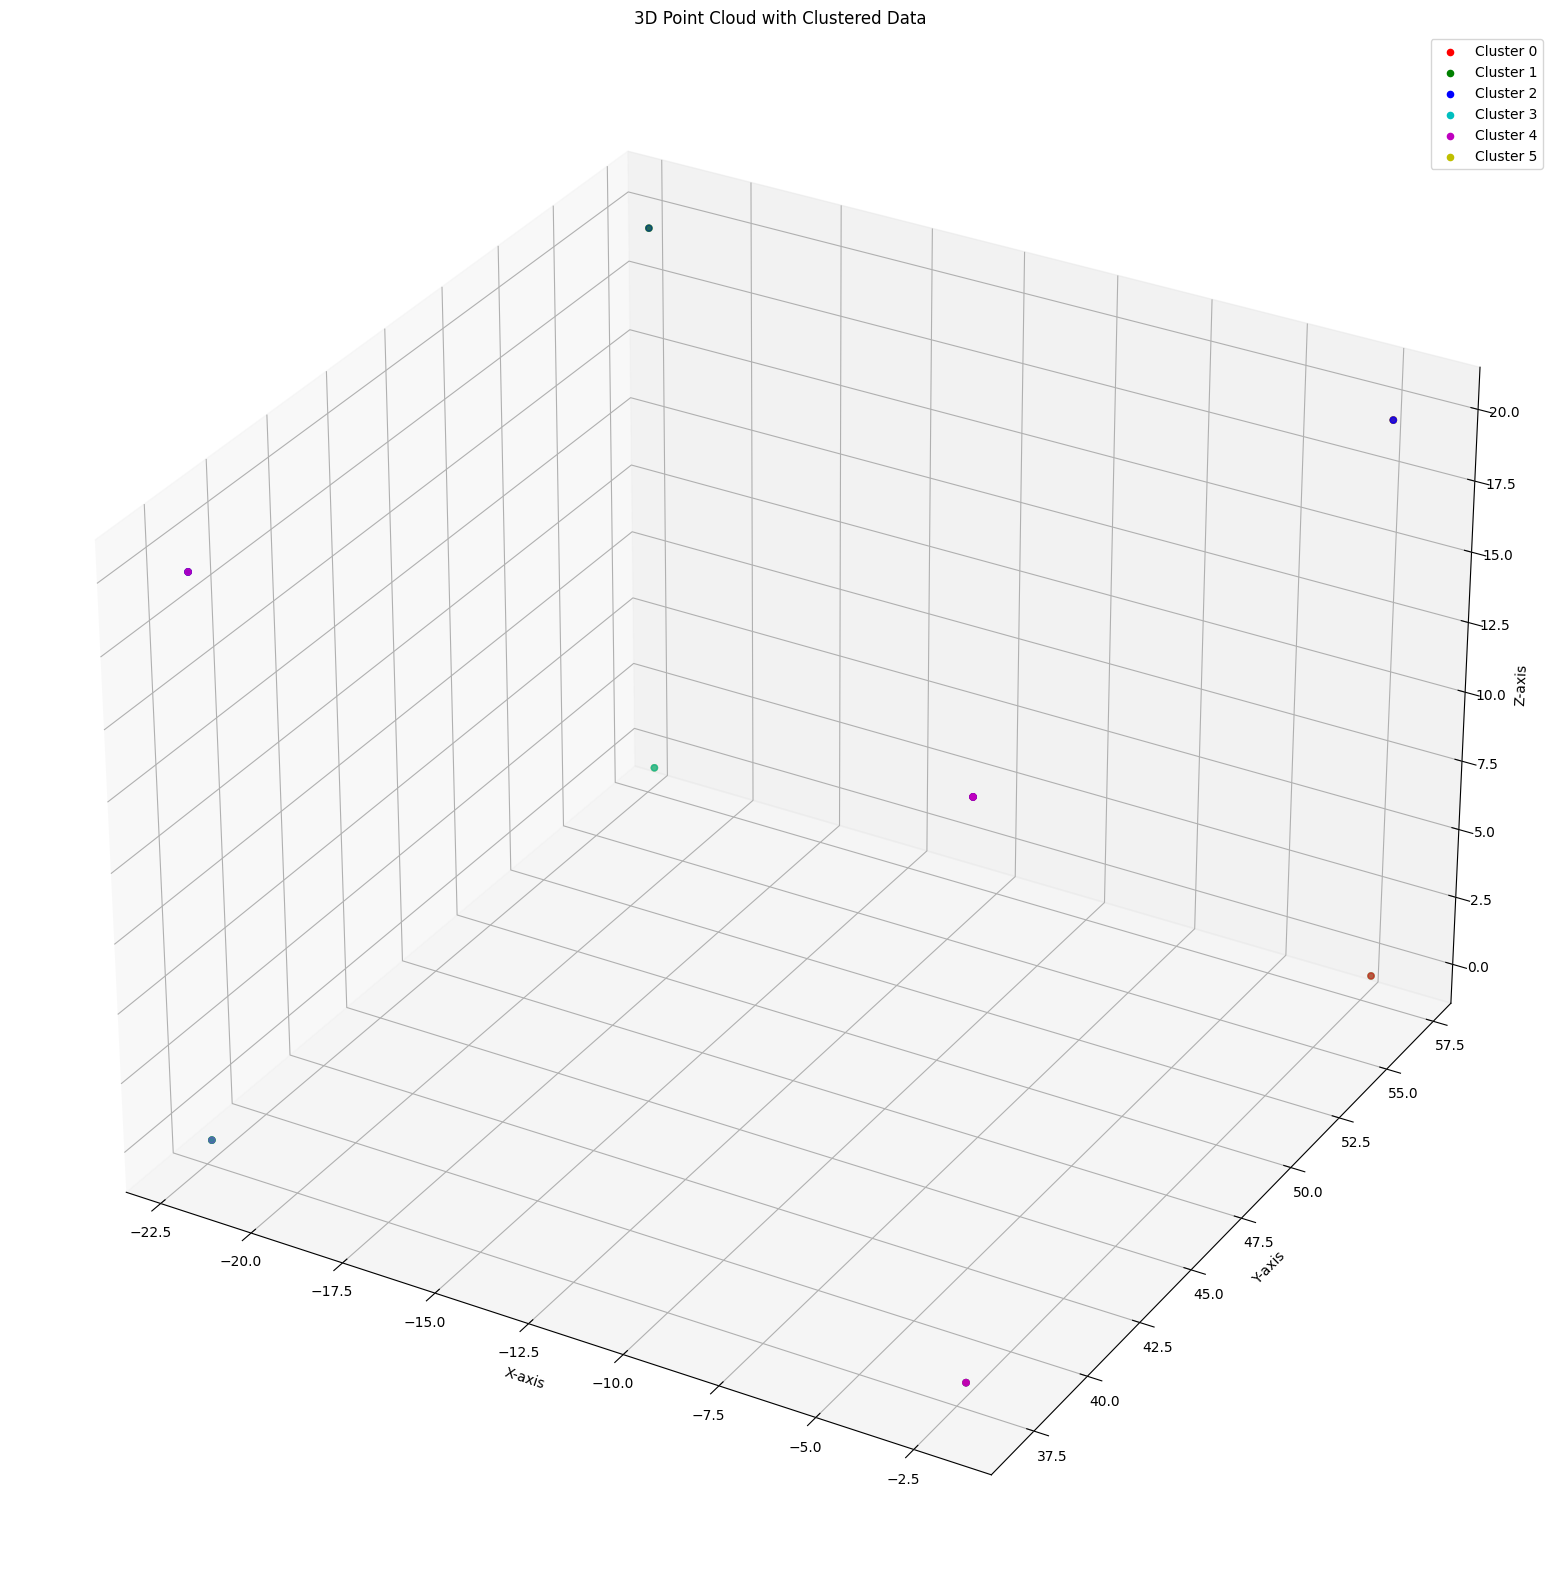

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_point_cloud(points, labels):
    # 準備不同分群的顏色
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k','blue','pink','gray','purple','orange','cyan','green','olive','tan','gold','violet','hotpink','tomato']

    # 創建 3D 散點圖
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111, projection='3d')

    # 根據分群標籤繪製點
    for label in np.unique(labels):
        indices = labels == label
        ax.scatter(points[indices, 0], points[indices, 1], points[indices, 2], c=colors[label], label=f'Cluster {label}')

    # 設置標題和軸標籤
    ax.set_title('3D Point Cloud with Clustered Data')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    # 顯示分群的圖例
    ax.legend()

    # 顯示散點圖
    plt.show()



# 顯示分群結果
plot_3d_point_cloud(v, labels_db)

In [31]:
from stl import mesh
# 將分割後的平面重組回去
def combine_stl_files(input_files, output_file):
    # 獲取每個STL檔案的頂點和三角形
    vertices = []
    triangles = []
    for stl_file in input_files:
        # 從指定檔案讀取三角網格數據
        mesh_data = mesh.Mesh.from_file(stl_file)
        for point in mesh_data.points:
            vertices.append(point)
        for triangle in mesh_data.vectors:
            triangles.append(triangle)
    
    # 創建新的STL檔案
    combined_mesh = mesh.Mesh(np.zeros(len(triangles), dtype=mesh.Mesh.dtype))
    combined_mesh.points = np.array(vertices)
    combined_mesh.vectors = np.array(triangles)

    # 保存合併後的STL檔案
    combined_mesh.save(output_file)


combine_stl_files(rebuild, 'combined_model.stl')